# car price prediction

In [1]:
# dataset_link= "//www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv"

In [2]:
# importing and loading data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

df = pd.read_csv(f"D:\kiggle file\project/car_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# number of row and column

df.shape

(301, 9)

In [4]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
# only object column name
cols = [c for c in df.columns if df[c].dtype in ['object', 'datetime64[ns]']]
cols

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [6]:
# another way
df.select_dtypes(["object"]).columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [7]:
# checking missing value

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of catagorical data

print("\nfuel type : \n",df.Fuel_Type.value_counts())
print("\nseller type : \n",df.Seller_Type.value_counts())
print("\nTransmission : \n ",df.Transmission.value_counts())


fuel type : 
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

seller type : 
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Transmission : 
  Manual       261
Automatic     40
Name: Transmission, dtype: int64


# encoding the categorical data

In [9]:
# encoding "fule_type"
df.replace({"Fuel_Type": {"Petrol": 0,"Diesel":1,"CNG":1}},inplace=True)

# encoding seller type
df.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}},inplace=True)

#encoding Transmission 
df.replace({"Transmission":{"Manual":0, "Automatic":1}},inplace=True)

In [10]:
# looking into filtered dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# spliting the input_data and target

In [11]:
# x = input data
#y = target data(price)

X = df.drop(["Car_Name","Selling_Price"],axis=1)
Y = df.Selling_Price


# Spliting the training and testing data


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# 1. Linear Regression

In [15]:
# loading the linear regression
model = LinearRegression()

# training the model
model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation



# 1.1 prdiction on training data

In [16]:
# prediction 
y_pred_train = model.predict(X_train)

In [18]:
# r_squared error 
# it is a regression error metric that justifies the performance of the model
# the coloser to 1 the perfect the fit

score_1 = metrics.r2_score(Y_train,y_pred_train)
print("r_square error: ",score_1)

r_square error:  0.8817042927099858


# visualizing the training actual price and predicted price

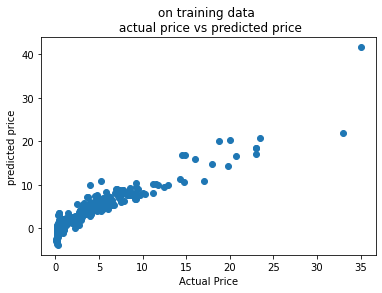

In [35]:

plt.scatter(Y_train,y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("on training data \n actual price vs predicted price")
plt.show()

# 1.2 predicton on testing data


In [20]:

y_pred = model.predict(X_test)

#r_square error

score= metrics.r2_score(Y_test,y_pred)
print("r_square error :",score)

r_square error : 0.8577470108166558


# visualizing the  actual price and predicted price on test dataset

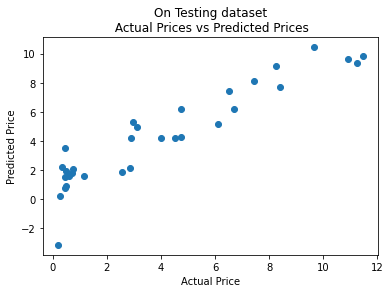

In [22]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("On Testing dataset\n Actual Prices vs Predicted Prices")
plt.show()

# 2.Lasso model

In [23]:
# lasso model
lasso_model = Lasso()

# training the model 
lasso_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation


# prediction on test dataset

In [28]:
# predict on lasso model
y_pred_l = lasso_model.predict(X_test)


In [29]:
# r_square error

score_l = metrics.r2_score(Y_test,y_pred_lasso)
print("r_square error for lasso model: ",score_1)

r_square error for lasso model:  0.8817042927099858


# visualizing the  actual price and predicted price on test dataset in lasso model

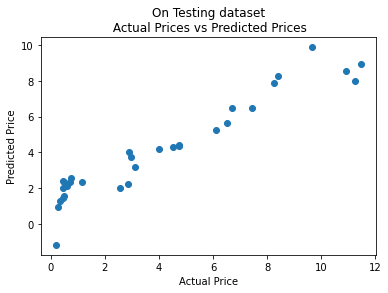

In [31]:
plt.scatter(Y_test, y_pred_l)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("On Testing dataset\n Actual Prices vs Predicted Prices")
plt.show()

# Conclution: 
"""
1. in linear regression model in testing dataset R_square error is =0.8577470108166558
2.in lasso model in testing dataset R_squere error is =  0.8817042927099858

so, the model work better on Lasso model.
"""